In [2]:
import numpy as np
import os
import pickle
import pandas as pd 
import matplotlib.pyplot as plt
from glob import glob
import re
import sys
sys.path.append('../../')

from modules.io.db_converters import db2bindata
from modules.binary.n_closed import *


from parameters import *

In [3]:
itemsets_data_dir = '../CLA_2020/results/'
#os.path.exists(itemsets_data_dir )
itemset_set_list = glob(itemsets_data_dir+ 'closed_itemsets/*')

start_data_name = len(itemsets_data_dir+ 'closed_itemsets/')
data_name_ads1 = '_without_labels'
data_name_ads2 = 'closed-1d.isc'

# Description of Structural Levels

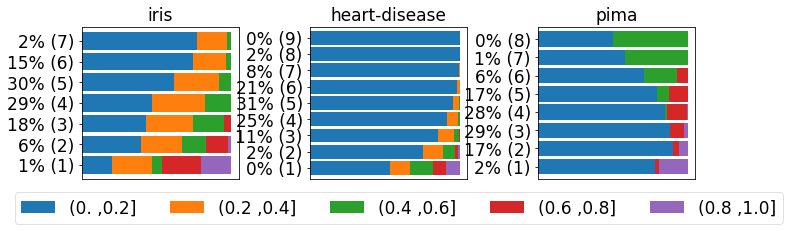

In [8]:
font_size = 17
horiz_offset= .9


f, axes = plt.subplots(1, 3, figsize = (11, 2.8))

for i, name in enumerate(['iris', 'heart-disease', 'pima']):

    df = pd.read_csv(itemsets_data_dir + 'closed_itemsets/' + name + '/frequency_distribution_by_levels.csv', index_col=0)
    df_new = df.drop(['total', 'k', 'labels'], axis = 1)

    ax = df_new.plot.barh(stacked=True, edgecolor='none', width=0.85, ax = axes[i], fontsize = font_size)
    ax.tick_params(axis='both', which='major', labelsize=font_size )
    ax.set_yticklabels(df.labels, fontsize = font_size)
    ax.set_title(name, fontsize = font_size)
    ax.get_legend().remove()
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.legend(prop = {'size' : font_size}, framealpha=0.6, ncol=5, bbox_to_anchor=(-3.38, -.35, 0., 1.102), loc='lower left',)

plt.subplots_adjust(wspace=.45, hspace = .0)

### Compression ratio (by frequency and levels)

### Compression ratio by frequency

In [5]:
first_datasets  = ['auto', 'breast', 'car_evaluation', 'ecoli', 'glass', 'heart-disease', 'hepatitis']
second_datasets = ['iris', 'led7', 'pima', 'soybean', 'tic_tac_toe', 'wine', 'zoo']

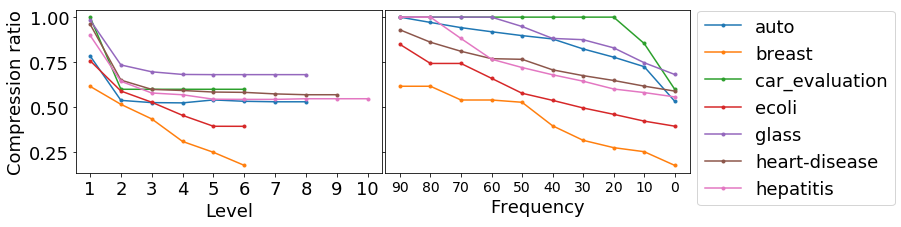

In [15]:
fontsize = 18

df = pd.read_csv('./results/gradual_characteristics.csv',  index_col=0)
data_name = sorted(df.data_name.unique())

f, axes = plt.subplots(1, 2, figsize = (11, 3), sharey = True)

df_levels = df[df.type == 'level']
for dname in first_datasets:
    df_temp = df_levels[df_levels.data_name == dname]
    axes[0].plot(df_temp.threshold, df_temp.CR, label = dname, marker = '.')
axes[0].set_ylabel('Compression ratio', fontsize = fontsize)
axes[0].set_xlabel('Level', fontsize = fontsize)
axes[0].set_xticks(np.arange(1, 11))
axes[0].tick_params(axis='both', which='major', labelsize=fontsize)


df_frequency = df[df.type == 'frequency']
for dname in first_datasets:
    df_temp = df_frequency[df_frequency.data_name == dname]
    axes[1].plot(df_temp.threshold, df_temp.CR, label = dname, marker = '.')
axes[1].tick_params(axis='both', which='major', labelsize=14)
axes[1].set_xlabel('Frequency', fontsize = fontsize)
axes[1].set_xlim(95, -5)
axes[1].set_xticks(np.arange(90, -1, -10))
axes[1].legend(loc='upper right', bbox_to_anchor=(1.7, 1.05), fontsize = fontsize)
plt.subplots_adjust(wspace=.01, hspace = 0.02)

plt.savefig('./figures/compression_ratio1.png', transparent = True, bbox_inches='tight',  pad_inches=0.1)
plt.show()

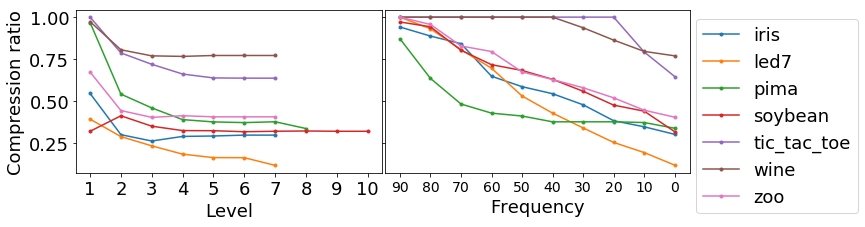

In [21]:
fontsize = 18


df = pd.read_csv('./results/gradual_characteristics.csv',  index_col=0)
data_name = sorted(df.data_name.unique())

f, axes = plt.subplots(1, 2, figsize = (11, 3), sharey = True)

df_levels = df[df.type == 'level']
for dname in second_datasets:
    df_temp = df_levels[df_levels.data_name == dname]
    axes[0].plot(df_temp.threshold, df_temp.CR, label = dname, marker = '.')
axes[0].set_ylabel('Compression ratio', fontsize = fontsize)
axes[0].set_xlabel('Level', fontsize = fontsize)
axes[0].set_xticks(np.arange(1, 11))
axes[0].tick_params(axis='both', which='major', labelsize=fontsize)


df_frequency = df[df.type == 'frequency']
for dname in second_datasets:
    df_temp = df_frequency[df_frequency.data_name == dname]
    axes[1].plot(df_temp.threshold, df_temp.CR, label = dname, marker = '.')
axes[1].tick_params(axis='both', which='major', labelsize=14)
axes[1].set_xlabel('Frequency', fontsize = fontsize)
axes[1].set_xlim(95, -5)
axes[1].set_xticks(np.arange(90, -1, -10))
axes[1].legend(loc='upper right', bbox_to_anchor=(1.58, 1.), fontsize = fontsize)

plt.subplots_adjust(wspace=.01, hspace = 0.02)
plt.savefig('./figures/compression_ratio2.png', transparent = True, bbox_inches='tight',  pad_inches=0.1)
plt.show()

# Supervised settings

In [23]:
data_list = ['auto', 'breast', 'car_evaluation', 'ecoli', 'glass', 'heart-disease', 'hepatitis', 'iris', 'led7', 'pima', 'soybean', 'tic_tac_toe', 'wine', 'zoo']

## F1 measure

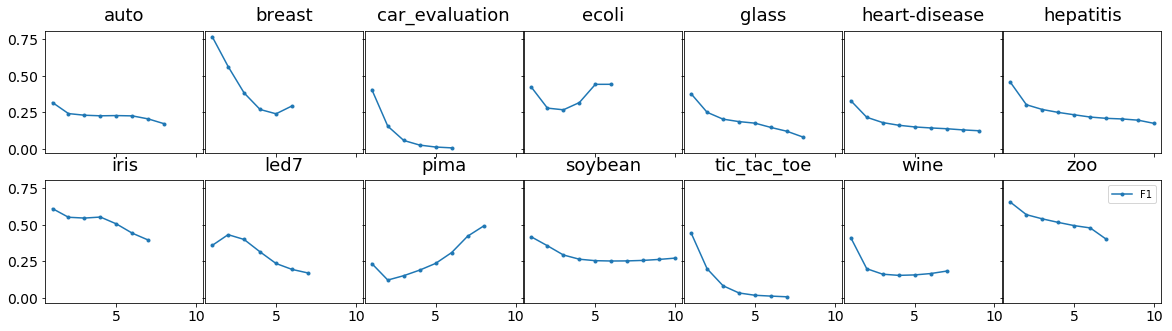

In [61]:
fontsize = 18


f, axes = plt.subplots(2, int(len(data_list) / 2), figsize = (20, 5), sharey = True, sharex = True)

for i, data_name in enumerate(data_list):
    
    column_id= int(i % 7)
    row_id = int(i / 7)
    folder_name = '../CLA_2020/results/closed_itemsets/' + data_name + '/'
    df = pd.read_csv(folder_name + 'performance.csv', decimal=',', sep = ';', index_col= False)
    accuracy = (df.tp + df.tn) / (df.tp + df.tn + df.fn + df.fp)  
    axes[row_id, column_id].plot(df.level, df.f1, label = 'F1', marker = '.')   
    axes[row_id, column_id].tick_params(labelsize=14)
    #axes[row_id, column_id].plot(df.level, df.precision, label = 'PR', marker = '.')
    #axes[row_id, column_id].plot(df.level, df.recall, label = 'RC', marker = '.')
    #axes[row_id, column_id].plot(df.level, accuracy, label = 'ACC', marker = '.')
    axes[row_id, column_id].set_title(data_name, fontdict = {'verticalalignment': 'bottom', 'size' : fontsize})

    
plt.subplots_adjust(wspace=.01, hspace = 0.22)    
plt.legend()

## Commulative precision

In [37]:
first_datasets  = [ 'breast',  'ecoli', 'iris', 'led7','wine', 'zoo']
second_datasets = ['auto', 'car_evaluation', 'glass', 'heart-disease', 'hepatitis',  'pima', 'tic_tac_toe', 'soybean', ]

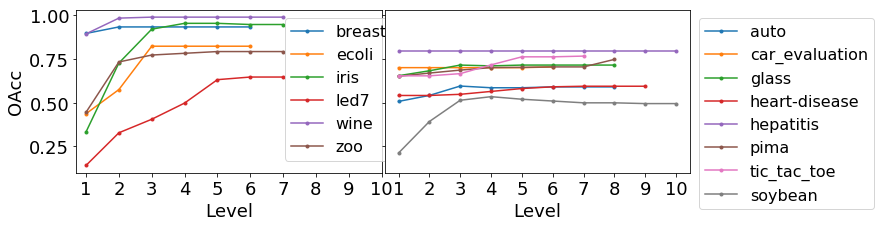

In [57]:
fontsize = 18

df = pd.read_csv('./results/precision.csv', index_col=0)
data_name = sorted(df.data_name.unique())
#df_single = df[df.type == 'single']
df_commulative = df[df.type == 'commulative']

f, axes = plt.subplots(1, 2, figsize = (11, 3), sharey = True)

df_levels = df[df.type == 'level']
for dname in first_datasets:
    df_temp = df_commulative[df_commulative.data_name == dname]
    axes[0].plot(df_temp.num_level, df_temp.accuracy, label = dname, marker = '.')
axes[0].set_ylabel('OAcc', fontsize = fontsize)
axes[0].set_xlabel('Level', fontsize = fontsize)
axes[0].set_xticks(np.arange(1, 11))
axes[0].legend(fontsize = 16,  loc='upper right', bbox_to_anchor=(1.065, 1.))
axes[0].tick_params(axis='both', which='major', labelsize=fontsize)

for dname in second_datasets:
    df_temp = df_commulative[df_commulative.data_name == dname]
    axes[1].plot(df_temp.num_level, df_temp.accuracy, label = dname, marker = '.')
axes[1].set_xlabel('Level', fontsize = fontsize)
axes[1].set_xticks(np.arange(1, 11))


axes[1].set_xticks(np.arange(1, 11))

axes[1].legend(loc='upper right', bbox_to_anchor=(1.63, 1.),fontsize = 16)
axes[1].tick_params(axis='both', which='major', labelsize=fontsize)

plt.subplots_adjust(wspace=.01, hspace = 0.01)
plt.savefig('./figures/oacc.png', transparent = True, bbox_inches='tight',  pad_inches=0.1)
plt.show()

## Candidates vs compression ratio

In [ ]:
import matplotlib as mpl

In [34]:
precision = 3

results = []
for data in data_list_without_labels:
    data_name = data['data_name']
    dname = data['dname']
    data_dir = main_data_dir + data_name + '/transformed/'
    dataset = db2bindata(data_dir, dname + '_without_labels').astype(int)
    n_attributes = dataset.shape[1]
    
    # slim
    data_slim_dir = main_data_dir + data_name + '/transformed/compress_ng/*without_labels-*slim*/'
    #data_slim_dir_log = glob(data_slim_dir + '/*.log')[0]
    data_slim_dir_csv = glob(data_slim_dir + '/report*.csv')[0]
    df = pd.read_csv(data_slim_dir_csv, sep = ';')    
    n_candidates = max(df.numCands)
    cr = min(df.totalSize) / max(df.totalSize)
    results.append({'name' : data_name, 'CR' : np.round(cr,precision), 'algo' : 'SLIM'})
     
    for (cand_type, file_type) in [('KRIMP2', '_2'), ('KRIMP3', '_3'), ('KRIMP', '*krimp-closed-1d')]:
        data_krimp_dir = main_data_dir + data_name + '/transformed/compress/*without_labels' + file_type + '*/report*.csv'
        data_levels_dir_csv = glob(data_krimp_dir)[0]
        df = pd.read_csv(data_levels_dir_csv, sep = ';')
        n_candidates = max(df.numCands)
        cr = min(df.totalSize) / max(df.totalSize)
        results.append({'name' : data_name, 'n_candidates' : n_candidates, 'CR' : np.round(cr,precision), 'algo' :cand_type})

In [35]:
df = pd.DataFrame(results)
df_cr = df.pivot_table(index = 'name', columns = 'algo')['CR']
df_candidates = df.pivot_table(index = 'name', columns = 'algo')['n_candidates']

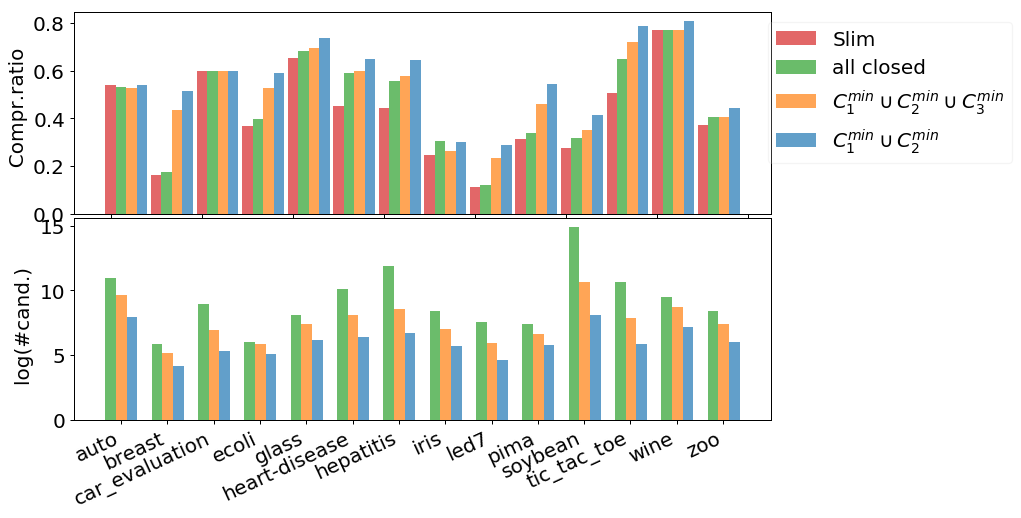

In [50]:
dpi = 90
wd = 0.23
fig, axes  = plt.subplots(2,1, dpi = dpi, figsize = (900 / dpi, 600 / dpi) )
mpl.rcParams.update({'font.size': 10})

xs = range(df_cr.shape[0])

for i, (col_name, label_name, color_name) in enumerate([('SLIM','Slim', '#d62728'), ('KRIMP', 'all closed', '#2ca02c'), 
    ('KRIMP3', r'$C_1^{min} \cup C_2^{min}\cup C_3^{min}$', '#ff7f0e'), ('KRIMP2', r'$C_1^{min} \cup C_2^{min}$', '#1f77b4') ]):
    axes[0].bar([x + wd*i for x in xs], df_cr[col_name],
        width = wd, color = color_name, alpha = 0.7, label = label_name,
        zorder = 2)
axes[0].set_ylabel('  Compr.ratio', fontsize = 16)
axes[0].tick_params(labelsize = 16) 
axes[0].legend(loc='upper right', framealpha=0.2, bbox_to_anchor=(1.36, 1.),fontsize = 16)


for i, (col_name, label_name, color_name) in enumerate([('SLIM','Slim', '#d62728'), ('KRIMP', 'all closed', '#2ca02c'), 
    ('KRIMP3', r'$C_1^{min} \cup C_2^{min}\cup C_3^{min}$', '#ff7f0e'), ('KRIMP2', r'$C_1^{min} \cup C_2^{min}$', '#1f77b4') ]):
    if i > 0:
        axes[1].bar([x + wd*i for x in xs], np.log(df_candidates[col_name]),
            width = wd, color = color_name, alpha = 0.7, label = label_name,
            zorder = 2)
axes[1].set_ylabel('log(#cand.)  ', fontsize = 16)

axes[1].tick_params(labelsize = 16)
fig.autofmt_xdate(rotation = 25)
plt.xticks([v + 0.45 for v in xs], df_cr.index, fontsize = 16)
plt.subplots_adjust(wspace=.01, hspace = 0.02)